# Clustering

In [2]:
%load_ext autoreload
%autoreload 2
import os, inspect, sys
import cartopy.crs as ccrs
main_dir = os.path.join(
    os.path.dirname(
    os.path.dirname(
        os.path.abspath(inspect.getfile(inspect.currentframe())))),'RGCPD') # RGCPD folder directory
thesis_dir = os.path.dirname(main_dir)
data_dir = os.path.join(thesis_dir, 'Data')
RGCPD_func = os.path.join(main_dir, 'RGCPD')
cluster_func = os.path.join(main_dir, 'clustering')
if RGCPD_func not in sys.path:
    sys.path.append(RGCPD_func)
    sys.path.append(cluster_func)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%load_ext autoreload
%autoreload 2
import clustering_spatial as cl
from RGCPD import RGCPD
import plot_maps

#preprocessed target variable and precursors, with extent set to Europe and masked to sea/land. PRODUCES WEIRD CLUSTERING
TV_prec_list_pp = [('t2m', 
                 os.path.join(thesis_dir, 'Data', 't2m_1950-2020_1-12_monthly_0.25deg_Europe.nc')),
                ('sst',
                 os.path.join(thesis_dir, 'Data', 'sst_1950-2020_1_12_monthly_1.0deg_Europe.nc')),
                ('swvl1_2',
                os.path.join(thesis_dir, 'Data', 'swvl_1950-2020_1_12_monthly_1.0deg_Europe.nc'))
               ]

#define input: original, global datasets, non-masked, except for svwl = masked and summed for layers 1 and 2
TV_prec_list_org = [('fake', os.path.join(thesis_dir, 'Data', 't2m_1950-2020_1-12_monthly_0.25deg_Europe.nc')),
                ('value',
                 os.path.join(thesis_dir, 'Data', 'sst_1950-2020_1_12_monthly_1.0deg.nc')),
                ('value',
                os.path.join(thesis_dir, 'Data', 'swvl1_2_1950-2020_1_12_monthly_1.0deg_mask.nc'))
               ]

TV_test = [('fake', ('fake', 'by conventions: first entry links to filepath of 1-d target variable')),
                ('value',
                 os.path.join(thesis_dir, 'Data', 't2m_1950-2020_1-12_monthly_0.25deg_Europe_masklandsea.nc'))
               ]

#set start and end date for target variable
#start_end_TVdate = ('01-01', '12-31')

rg = RGCPD(list_of_name_path = TV_test)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Not able to load in plotting modules, check installment of networkx



Performing pre-processing value
sorting longitude

Handling time series longer then 120 day or monthly data, no smoothening applied
using absolute anomalies w.r.t. climatology of smoothed concurrent day accross years

Visual test latlon 47 21

C:\miniconda\envs\RGCPD1\lib\site-packages\numpy\lib\nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)




Detrending ...
Visual test latlon 53 32
writing ncdf file to:
C:\Users\Van Ingen\Documents\Jannes\School\VU\Econometrics\Thesis\Data\preprocessed\t2m_1950-2020_1-12_monthly_0.25deg_Europe_masklandsea.nc


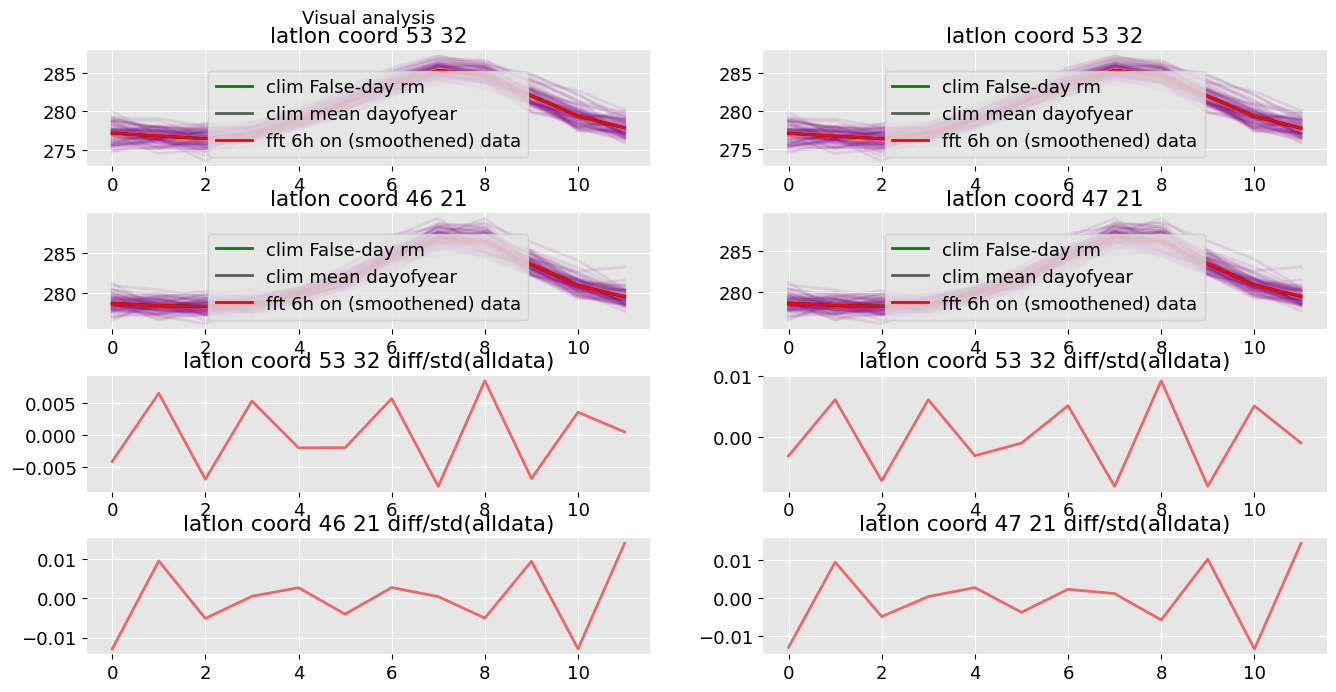

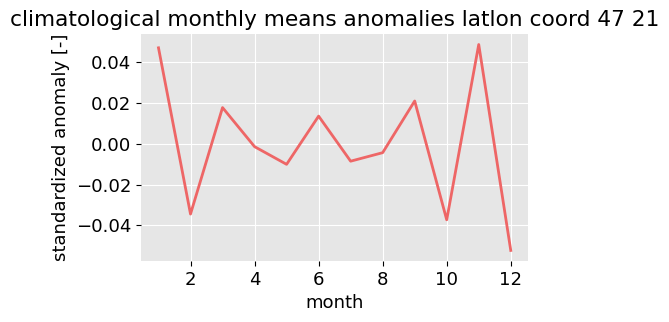

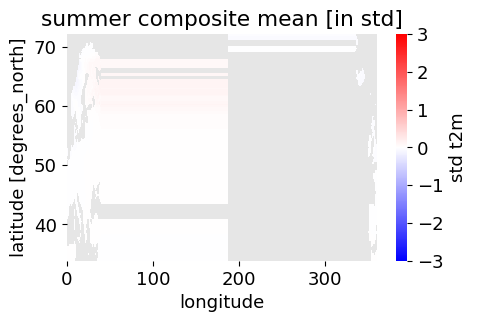

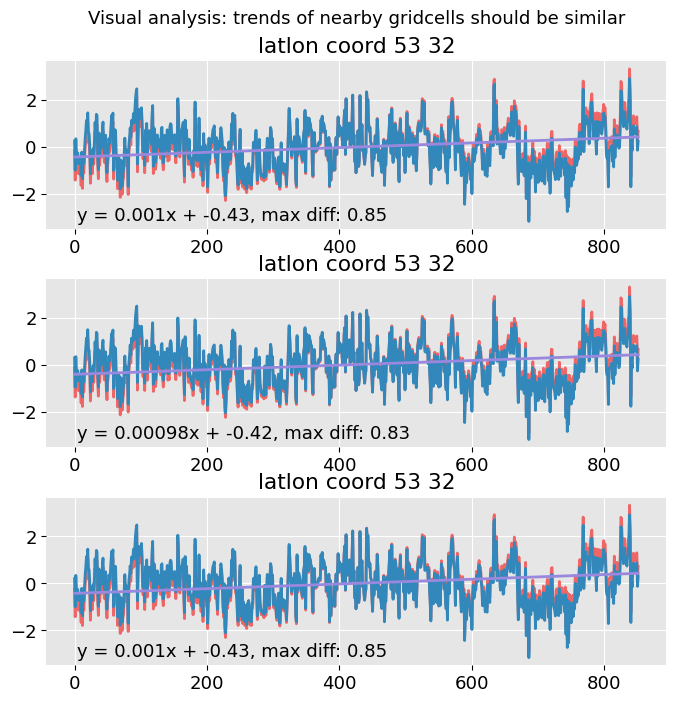

In [4]:
rg.pp_precursors()

In [5]:
rg.list_precur_pp

[('value',
  'C:\\Users\\Van Ingen\\Documents\\Jannes\\School\\VU\\Econometrics\\Thesis\\Data\\preprocessed\\t2m_1950-2020_1-12_monthly_0.25deg_Europe_masklandsea.nc')]

clustering fake: 0, n_clusters: 3
clustering fake: 0, n_clusters: 4
clustering fake: 0, n_clusters: 5
clustering fake: 0, n_clusters: 6
clustering fake: 0, n_clusters: 7


Plotting Corr maps t2m, split 0, n_clusters 3
Plotting Corr maps t2m, split 0, n_clusters 4
Plotting Corr maps t2m, split 0, n_clusters 5
Plotting Corr maps t2m, split 0, n_clusters 6
Plotting Corr maps t2m, split 0, n_clusters 7


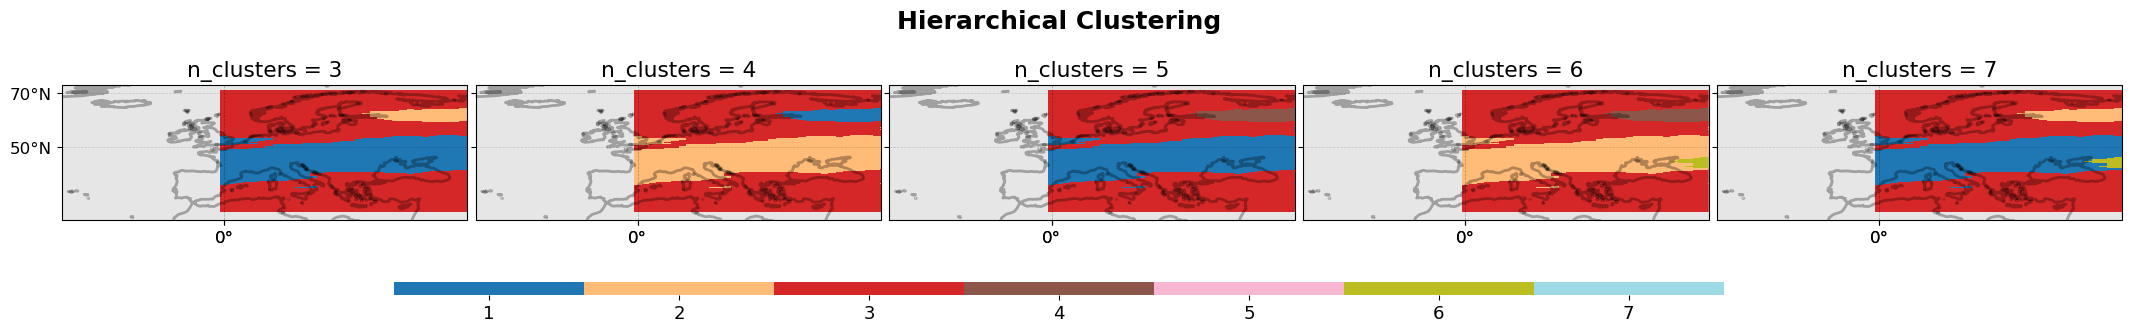

In [7]:
#cluster all precursors with some q to n clusters and show clustering maps, HIERARCHICAL CLUSTERING
mask = [-25.0,40.0,32.0,72.0]
mask_arr = os.path.join(data_dir,'Europe_mask.nc')
q = 95
n_clusters = [3, 4, 5, 6, 7]
projection = ccrs.LambertCylindrical(central_longitude = 0)

var_filename = rg.list_precur_pp[0][1]
xrclustered, results = cl.dendogram_clustering(var_filename, mask = mask,
                                                   kwrgs_clust={'q':q, 'n_clusters':n_clusters})
fig = plot_maps.plot_labels(xrclustered, {'col_dim':'n_clusters', 'title':'Hierarchical Clustering', 'map_proj': projection,
                                             'zoomregion':(-30.0,45.0,32.0,75.0)})

sorting longitude
clustering fake: 0, eps: 5 [[-3.27670000e+04 -3.27670000e+04 -3.27670000e+04 ... -3.27670000e+04
  -3.27670000e+04 -3.27670000e+04]
 [-3.27670000e+04 -3.27670000e+04 -3.27670000e+04 ... -3.27670000e+04
  -3.27670000e+04 -3.27670000e+04]
 [-3.27670000e+04 -3.27670000e+04 -3.27670000e+04 ... -3.27670000e+04
  -3.27670000e+04 -3.27670000e+04]
 ...
 [ 2.18431637e+00  5.31625024e-01  1.86113887e+00 ... -8.28263738e-01
  -6.19223862e-01  2.35905111e-03]
 [ 2.50021543e+00  2.69975860e-01  1.96929404e+00 ... -3.84169270e-01
  -7.84835783e-01 -2.72881694e-01]
 [ 1.80341269e+00  9.30788904e-02  1.90834328e+00 ... -1.10282265e-01
  -2.79483799e-01  1.29329033e-01]]
clustering fake: 0, eps: 10 [[-3.27670000e+04 -3.27670000e+04 -3.27670000e+04 ... -3.27670000e+04
  -3.27670000e+04 -3.27670000e+04]
 [-3.27670000e+04 -3.27670000e+04 -3.27670000e+04 ... -3.27670000e+04
  -3.27670000e+04 -3.27670000e+04]
 [-3.27670000e+04 -3.27670000e+04 -3.27670000e+04 ... -3.27670000e+04
  -3.276700

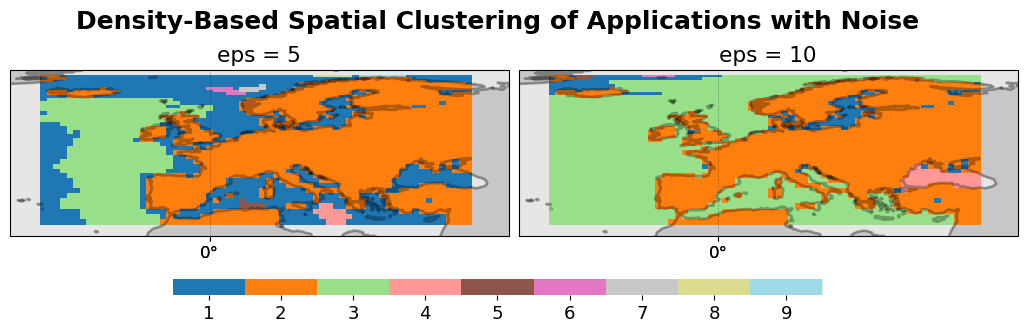

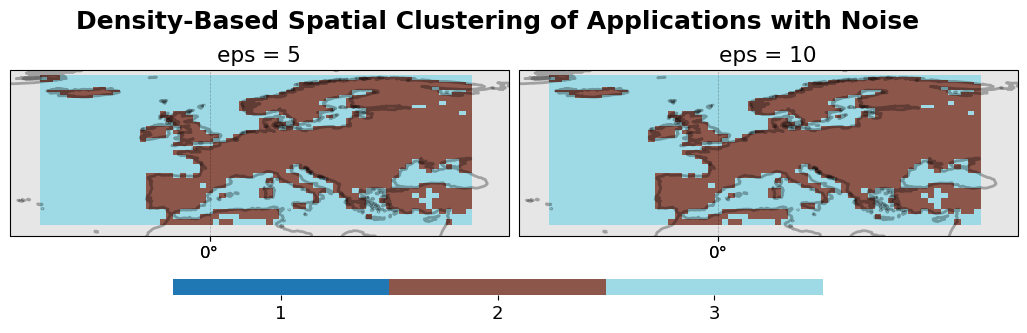

In [39]:
#cluster all precursors using some distance eps and show clustering maps, DBSCAN CLUSTERING
eps = [5,10]
projection = ccrs.LambertCylindrical(central_longitude=0)

for i in rg.list_precur_pp:
    var_filename = i[1]
    xrclustered, results = cl.sklearn_clustering(var_filename, mask=mask_arr, clustermethodkey='DBSCAN', kwrgs_clust={'eps':eps})
    xrclustered += 1
    print(xrclustered)
    fig = plot_maps.plot_labels(xrclustered, {'col_dim':'eps', 'title':'Density-Based Spatial Clustering of Applications with Noise', 
                                              'map_proj': projection,
                                             'zoomregion':(-30.0,45.0,32.0,75.0)})


In [22]:
#what are we doing here?
for i in rg.list_precur_pp:
    var_filename = i[1]

    xrclustered, results = cl.sklearn_clustering(var_filename, mask=mask, kwrgs_load={'tfreq':15,
                                                                                      'start_end_date':('06-01','08-31')},
                                                 clustermethodkey='DBSCAN', kwrgs_clust={'eps':[8, 10]})
    xrclustered += 1
    fig = plot_maps.plot_labels(xrclustered, {'col_dim':'eps', 
                                              'title':'Density-Based Spatial Clustering of Applications with Noise (JJA, 15-day means)'
                                             }
                               )


sorting longitude
clustering fake: 0, eps: 8 

ValueError: conflicting sizes for dimension 'time': length 1065 on the data but length 71 on coordinate 'time'